In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path = '/content/drive/My Drive/NLP AAPL Data/NLP AAPL Data.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Close/Last,Volume,Open,High,Low
0,12/31/2019,$73.41,100990520,$72.48,$73.42,$72.38
1,12/30/2019,$72.88,144238440,$72.37,$73.17,$71.31
2,12/27/2019,$72.45,146371760,$72.78,$73.49,$72.03
3,12/26/2019,$72.48,93336000,$71.21,$72.50,$71.18
4,12/24/2019,$71.07,48478840,$71.17,$71.22,$70.73


In [2]:
import pandas as pd

# Assuming 'data' is your existing dataframe
# Clean the 'Close/Last', 'Open', 'High', 'Low' columns by removing dollar signs and converting to float
data['Close/Last'] = data['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['Open'] = data['Open'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['High'] = data['High'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['Low'] = data['Low'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Clean the 'Volume' column if necessary (it might have commas for thousands)
data['Volume'] = data['Volume'].replace({',': ''}, regex=True).astype(int)

# Now proceed with the calculations
# Calculate daily return (percentage change in closing price)
data['daily_return'] = (data['Close/Last'] - data['Close/Last'].shift(1)) / data['Close/Last'].shift(1) * 100

# Calculate price range (High - Low)
data['price_range'] = data['High'] - data['Low']

# Calculate daily volatility (High-Low % of Close)
data['daily_volatility'] = (data['High'] - data['Low']) / data['Close/Last'] * 100

# Calculate volume change (Current Volume - Previous Volume)
data['volume_change'] = data['Volume'] - data['Volume'].shift(1)

# Calculate gap between open and close (Close - Open as percentage of Open)
data['gap'] = (data['Close/Last'] - data['Open']) / data['Open'] * 100

# Classify sentiment based on daily return and gap (for simplicity)
def classify_sentiment(row):
    if row['daily_return'] > 0 and row['gap'] > 0:
        return 'Positive'
    elif row['daily_return'] < 0 and row['gap'] < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to each row
data['sentiment'] = data.apply(classify_sentiment, axis=1)

# Display the resulting dataframe
print(data[['Date', 'daily_return', 'price_range', 'daily_volatility', 'volume_change', 'gap', 'sentiment']])


            Date  daily_return  price_range  daily_volatility  volume_change  \
0     12/31/2019           NaN         1.04          1.416701            NaN   
1     12/30/2019     -0.721972         1.86          2.552141     43247920.0   
2     12/27/2019     -0.590011         1.46          2.015183      2133320.0   
3     12/26/2019      0.041408         1.32          1.821192    -53035760.0   
4     12/24/2019     -1.945364         0.49          0.689461    -44857160.0   
...          ...           ...          ...               ...            ...   
1253    1/8/2015     -0.107143         0.86          3.074723     22092120.0   
1254    1/7/2015     -3.682517         0.38          1.410542    -76741640.0   
1255    1/6/2015     -1.373422         0.70          2.634550    102795600.0   
1256    1/5/2015     -0.037636         0.81          3.049699     -5885480.0   
1257    1/2/2015      2.899096         1.02          3.732162    -44268440.0   

           gap sentiment  
0     1.2831

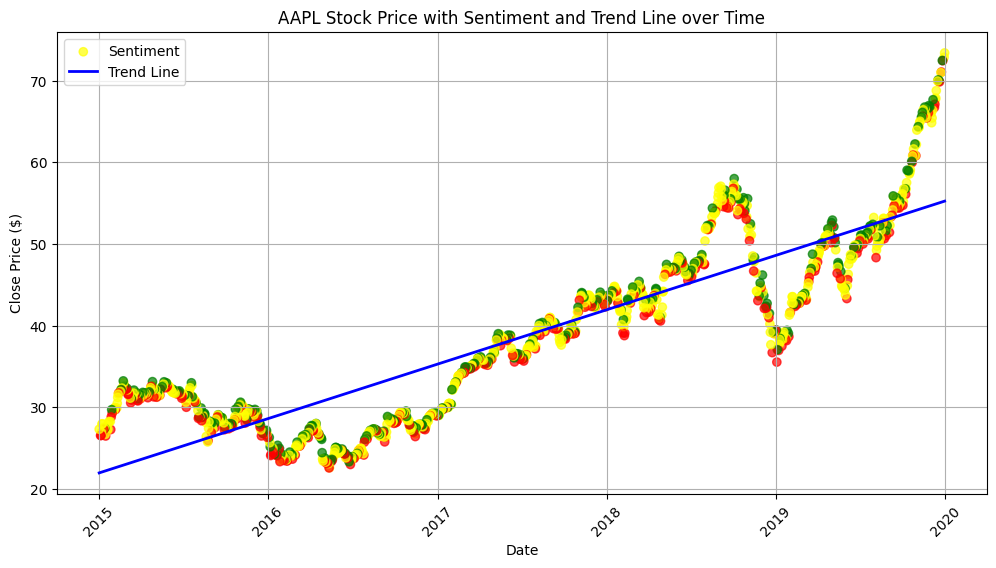

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Ensure that the 'date' column is a pandas datetime object
data['Date'] = pd.to_datetime(data['Date'])

# First, map the sentiment to colors (positive -> green, negative -> red, neutral -> yellow)
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}
data['sentiment_color'] = data['sentiment'].map(sentiment_colors)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data: Date on x-axis, Close price on y-axis, color by sentiment
plt.scatter(data['Date'], data['Close/Last'], c=data['sentiment_color'], label='Sentiment', alpha=0.7)

# Add a trend line (linear regression)
# Convert 'date' to numerical format for regression (since it's currently a datetime object)
data['date_ordinal'] = data['Date'].map(lambda date: date.toordinal())  # Convert dates to ordinals

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['date_ordinal'], data['Close/Last'])

# Generate trend line values
trend_line = slope * data['date_ordinal'] + intercept

# Plot the trend line
plt.plot(data['Date'], trend_line, color='blue', label='Trend Line', linewidth=2)

# Add a title and labels
plt.title('AAPL Stock Price with Sentiment and Trend Line over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Display legend and plot
plt.legend(loc='upper left')
plt.show()


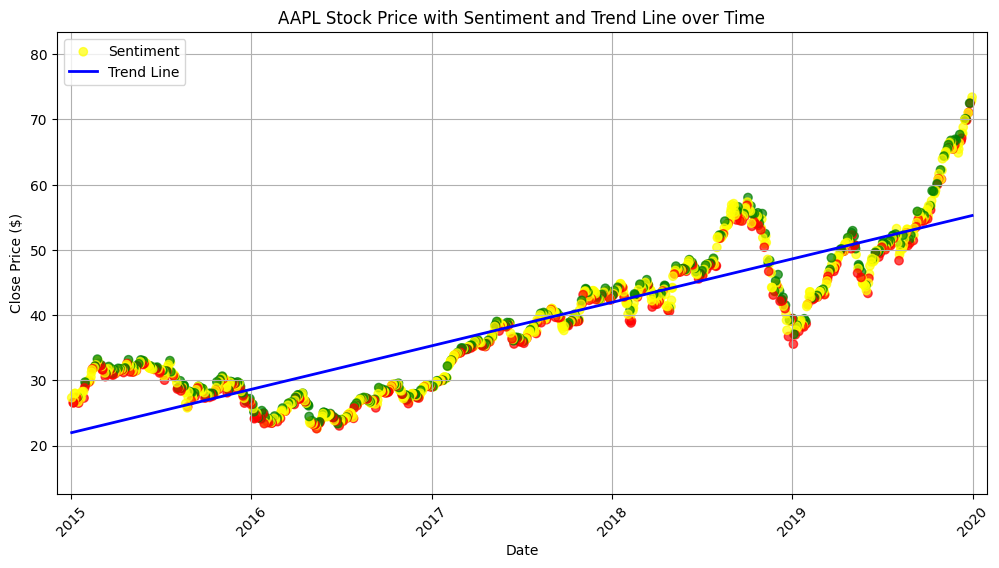

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Ensure that the 'Date' column is a pandas datetime object
data['Date'] = pd.to_datetime(data['Date'])

# First, map the sentiment to colors (positive -> green, negative -> red, neutral -> yellow)
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}
data['sentiment_color'] = data['sentiment'].map(sentiment_colors)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data: Date on x-axis, Close price on y-axis, color by sentiment
plt.scatter(data['Date'], data['Close/Last'], c=data['sentiment_color'], label='Sentiment', alpha=0.7)

# Add a trend line (linear regression)
# Convert 'Date' to numerical format for regression (since it's currently a datetime object)
data['date_ordinal'] = data['Date'].map(lambda date: date.toordinal())  # Convert dates to ordinals

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['date_ordinal'], data['Close/Last'])

# Generate trend line values
trend_line = slope * data['date_ordinal'] + intercept

# Plot the trend line
plt.plot(data['Date'], trend_line, color='blue', label='Trend Line', linewidth=2)

# Add a title and labels
plt.title('AAPL Stock Price with Sentiment and Trend Line over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Manually adjust the axis limits to widen the plot
plt.xlim([data['Date'].min() - pd.Timedelta(days=30), data['Date'].max() + pd.Timedelta(days=30)])  # Extend the date range slightly
plt.ylim([data['Close/Last'].min() - 10, data['Close/Last'].max() + 10])  # Add some buffer around the price range

# Display legend and plot
plt.legend(loc='upper left')
plt.show()


In [5]:
# Count the number of days for each sentiment category (positive, negative, neutral)
sentiment_counts = data['sentiment'].value_counts()

# Print the result
print(sentiment_counts)


sentiment
Neutral     619
Negative    322
Positive    317
Name: count, dtype: int64


In [6]:
# Export the DataFrame to an Excel file
output_file = 'updated_stock_data.xlsx'  # Specify the desired file name
data.to_excel(output_file, index=False)  # index=False excludes the index column from the Excel file

print(f"Data successfully exported to {output_file}")


Data successfully exported to updated_stock_data.xlsx
